# LEAF with KernelShap, LinearShap, and TreeShap

## Libraries

In [7]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## Dataset management
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


#LEAF
import leaf

In [20]:
#Churn dataset
url = 'https://github.com/EpistasisLab/pmlb/blob/master/datasets/churn/churn.tsv.gz?raw=true'
churn = pd.read_csv(url, compression='gzip', 
                                 header=0, sep = '\t', quotechar='"')

split = train_test_split(churn, shuffle=True)
X_train = split[0].drop('target', axis = 1)
y_train = split[0].iloc[:, -1]
X_test = split[1].drop('target', axis = 1)
y_test = split[1].iloc[:, -1]

class_names = ['0', '1']

#This data comes from:
#Le, Trang T., William La Cava, Joseph D. Romano, John T. Gregg, Daniel J. Goldberg, Praneel Chakraborty, 
#Natasha L. Ray, Daniel Himmelstein, Weixuan Fu, and Jason H. Moore. 
#PMLB v1. 0: an open source dataset collection for benchmarking machine learning methods. arXiv preprint arXiv:2012.00058 (2020)


## Random Forest:

### Training

In [41]:
model = RandomForestClassifier()
cls = leaf.train_model(X_train, y_train, model, verbose = True)

  * RandomForestClassifier accuracy: 0.82415181420926
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       657
           1       0.92      0.66      0.77        93

    accuracy                           0.95       750
   macro avg       0.94      0.82      0.87       750
weighted avg       0.95      0.95      0.95       750



### Evaluating Explanation Method (TreeExplainer vs KernelExplainer)

#### TreeExplainer

In [42]:
RF_tree = leaf.LEAF(cls, X_train, y_train, class_names, explanation_samples = len(X_train), explainer = 'TreeExplainer')
tree_metrics = RF_tree.explain_dataset(num_reps = 10, n_samples = 100)

#### KernelExplainer

In [43]:
RF_kernel = leaf.LEAF(cls, X_train, y_train, class_names, explainer = 'KernelExplainer')
kernel_metrics = RF_kernel.explain_dataset(num_reps = 10, n_samples = 100)

#### Comparison

<AxesSubplot:title={'center':'RF Kernel'}>

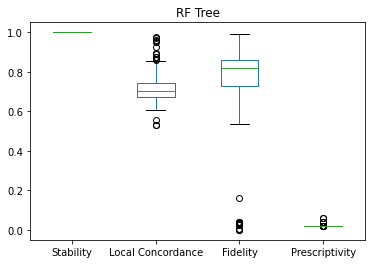

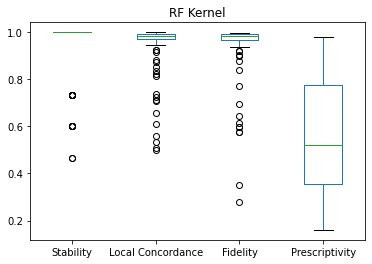

In [44]:
tree_metrics.plot(kind = 'box', title = 'RF Tree')
kernel_metrics.plot(kind = 'box', title = 'RF Kernel')

## Logistic Regression

### Training

In [45]:
lin_model = LogisticRegression(max_iter = 5000)
lincls = leaf.train_model(X_train, y_train, lin_model, verbose = True)

  * LogisticRegression accuracy: 0.758334560809152
              precision    recall  f1-score   support

           0       0.95      0.77      0.86       657
           1       0.32      0.74      0.45        93

    accuracy                           0.77       750
   macro avg       0.64      0.76      0.65       750
weighted avg       0.88      0.77      0.80       750



### Evaluating Explanation Method (LinearExplainer vs KernelExplainer)

#### LinearExplainer

In [51]:
import importlib
importlib.reload(leaf)

<module 'leaf' from 'C:\\Users\\alcon\\OneDrive - University of Pittsburgh\\Research\\LEAF\\leaf.py'>

In [52]:
LR_linear = leaf.LEAF(lincls, X_train, y_train, class_names, explanation_samples = len(X_train), explainer = 'LinearExplainer')
linear_metrics = LR_linear.explain_dataset(num_reps = 10, n_samples = 100)

#### Kernel Explainer

In [53]:
LR_kernel = leaf.LEAF(lincls, X_train, y_train, class_names, explanation_samples = len(X_train), explainer = 'KernelExplainer')
kernel_metrics = LR_kernel.explain_dataset(num_reps = 10, n_samples = 100)

#### Comparison

<AxesSubplot:title={'center':'LR Kernel'}>

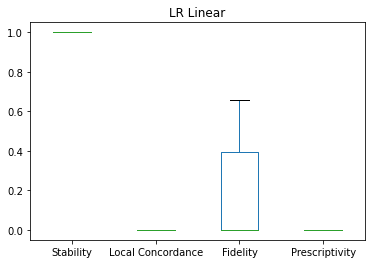

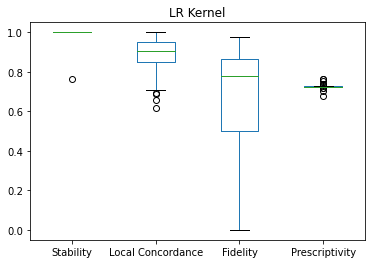

In [54]:
linear_metrics.plot(kind = 'box', title = 'LR Linear')
kernel_metrics.plot(kind = 'box', title = 'LR Kernel')